In [11]:
import pickle
import sys
sys.path.insert(1, '../functions/')
import os
from importlib import reload
import fun_plots
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from importlib import  reload

import pandas as pd
import seaborn as sns
import pickle
from utility import create_folder









In [12]:
scale = 5
cm2inch = 0.39
ssmall_SIZE = 3*scale
SMALL_SIZE = 4*scale
MEDIUM_SIZE = 6*scale
BIGGER_SIZE = 8*scale
LINE_WIDTH = 2*2
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize

plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('lines', linewidth=LINE_WIDTH)


In [13]:
filename ='../data/run_data/scores_models_rhos_kappas_021.pickle'
with open(filename, 'rb') as f:
    scores_models = pickle.load(f)



In [14]:

def find_score_max_argmax(scores_models,model_names=None,score_name ='evs'):
    """
    """
    # rearange the order of score_names
    if model_names is None:
        model_names = list(scores_models.keys())
    else:
        scores_models_new = dict()
        for model_name in model_names:
            scores_models_new[model_name] = scores_models[model_name]

        scores_models = scores_models_new
    len_rhos = scores_models[model_names[0]][score_name].shape[0]
    len_bs = scores_models[model_names[0]][score_name].shape[1]
    score_rhos_bs = np.zeros((len_rhos, len_bs,len(model_names)))

    # read scores into 2d matrix
    for k in range(len(model_names)):
        model_name = model_names[k]
        score_rhos_bs[:,:,k] = scores_models[model_name][score_name]


  

    if score_name =='mse':
        score_rhos_bs_argmax = np.argmin(score_rhos_bs,axis = 2)
        score_rhos_bs_max = np.min(score_rhos_bs,axis = 2)
    elif score_name =='evs':
        score_rhos_bs_argmax = np.argmax(score_rhos_bs,axis = 2)
        score_rhos_bs_max = np.max(score_rhos_bs,axis = 2)

   
    results = dict()
    results['score_rhos_bs'] = score_rhos_bs
    results['score_rhos_bs_argmax']=score_rhos_bs_argmax
    results['score_rhos_bs_max'] =score_rhos_bs_max

    results['model_names'] = list(scores_models.keys())
    return results

from fun_models_class import get_model_name_labels

def imshow_max_argmax(results, rhos, bs, score_name='evs',bs_type='sn', max_argmax_type ='max',cmap ='tab20b_r',
                       figsize = (6,5),savepath = None):

    if score_name =='evs':
        score_name_title ='EVS'
    elif score_name =='mse':
        score_name_title = 'MSE'
    else:
        score_name_title = score_name
    if max_argmax_type =='argmax':
        title = 'Best model ('+score_name_title+')'
        score_rhos_bs_argmax_max = results['score_rhos_bs_argmax']
        score_rhos_bs_argmax_max = score_rhos_bs_argmax_max[0:len(rhos), 0:len(bs)]
        
    elif max_argmax_type =='max':
        score_rhos_bs_argmax_max = results['score_rhos_bs_max']
        score_rhos_bs_argmax_max = score_rhos_bs_argmax_max[0:len(rhos), 0:len(bs)]
        title ='Best model performace ('+score_name_title+')'

    if bs_type =='kappa':
        xlabel =r'Gaussian Noise ratio ($\kappa$)'
    elif bs_type =='sn':
        xlabel =r'Gaussian Noise ($\sigma_g$)'
    

    model_names = results['model_names']
    model_name_labels =get_model_name_labels(model_names)

    from matplotlib import colormaps 
    
    from matplotlib import cm
    if max_argmax_type =='argmax':
        cmap=colormaps.get_cmap(cmap)
    fig,ax = plt.subplots(figsize = figsize)
    im=ax.imshow(score_rhos_bs_argmax_max,vmin = 0,aspect = 'auto',cmap = cmap);

    if max_argmax_type =='argmax':
        camp = colormaps.get_cmap(cmap)
        cbar = fig.colorbar(im,ticks = range(len(model_names)))
        # if cbar_labels is None:
        #     cbar_labels = model_name_labels
        cbar.ax.set_yticklabels(model_name_labels)
    elif max_argmax_type =='max':
        fig.colorbar(im)
    ylabel =r'Poisson noise ratio ($\rho$)'

    #set ticks
    xticks = np.arange(0,len(bs),2)
    yticks =np.arange(0,len(rhos),2)
    xticklabels = np.round(bs[xticks],1) # bs:sns or kappas
    yticklabels = np.round(rhos[yticks],1)
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)
    ax.set_xticklabels(xticklabels)
    ax.set_yticklabels(yticklabels)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    fig.tight_layout()

    if savepath is not None:
        create_folder(savepath)
        figname = max_argmax_type+'_'+score_name+'.pdf'
        figfile = os.path.join(savepath,figname)
        fig.savefig(figfile)



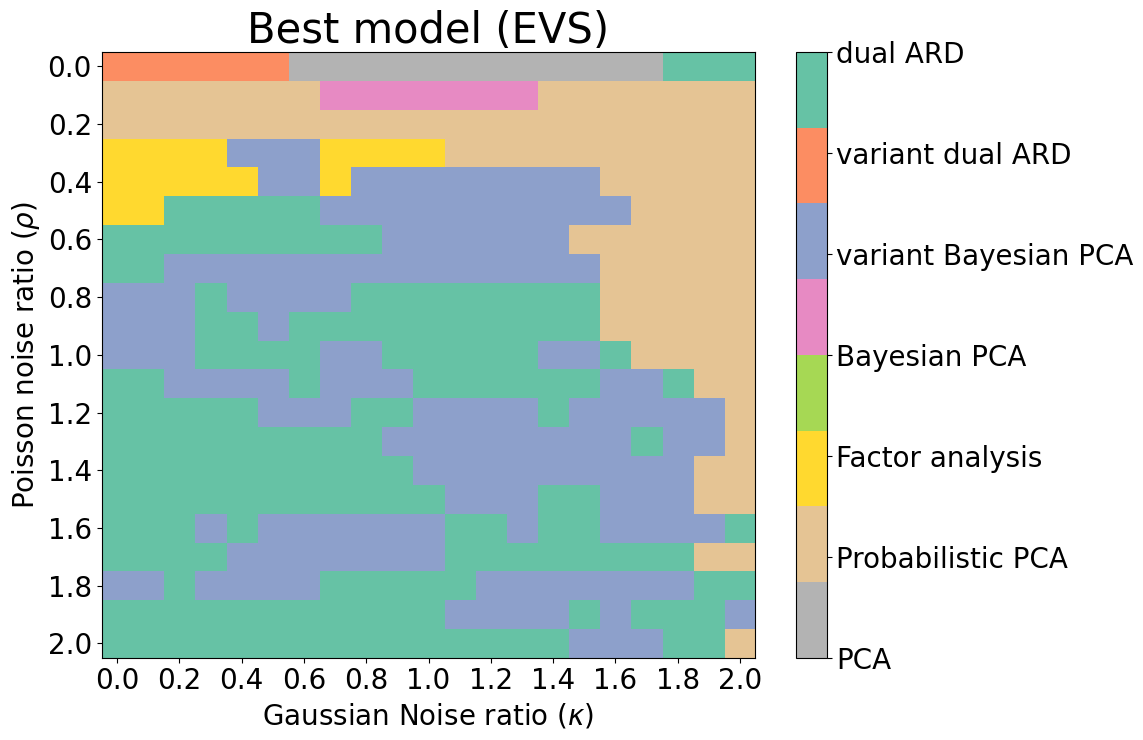

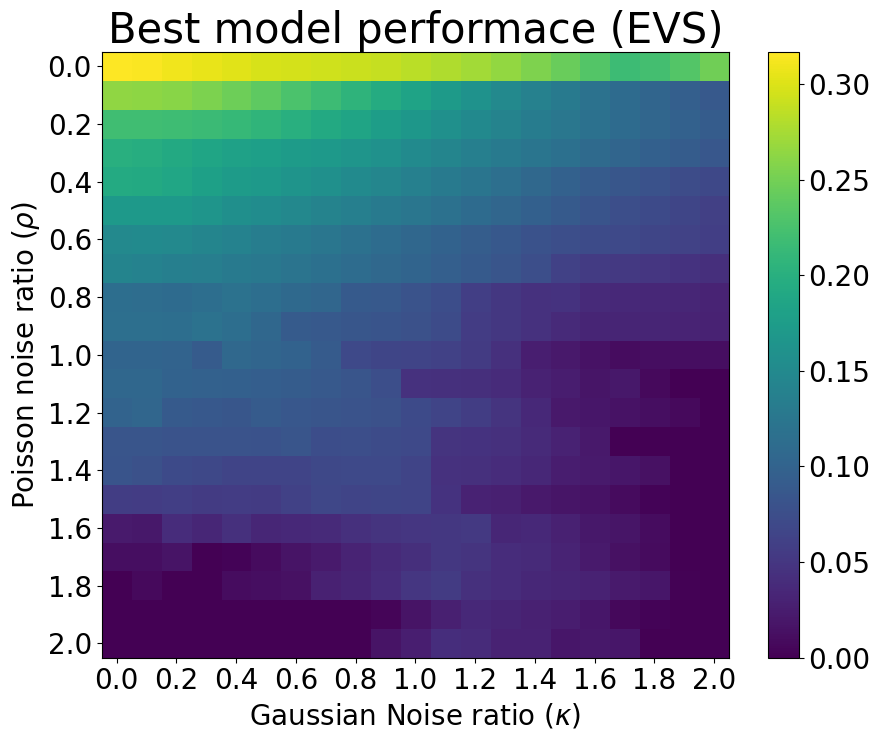

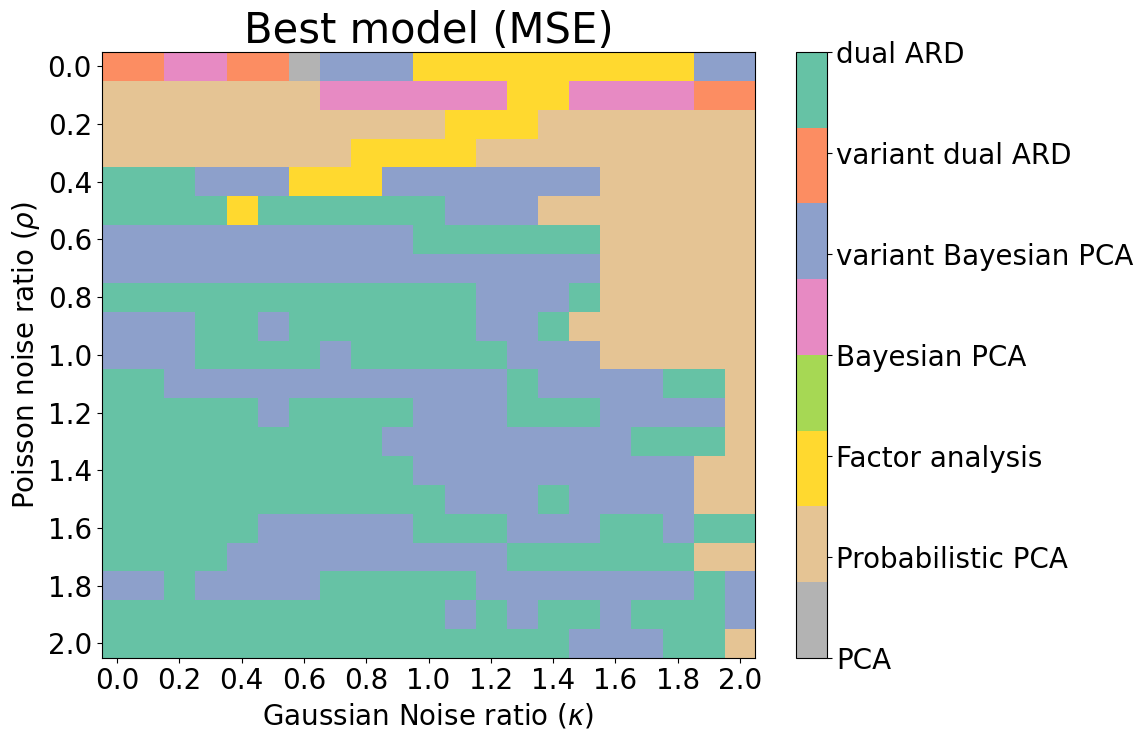

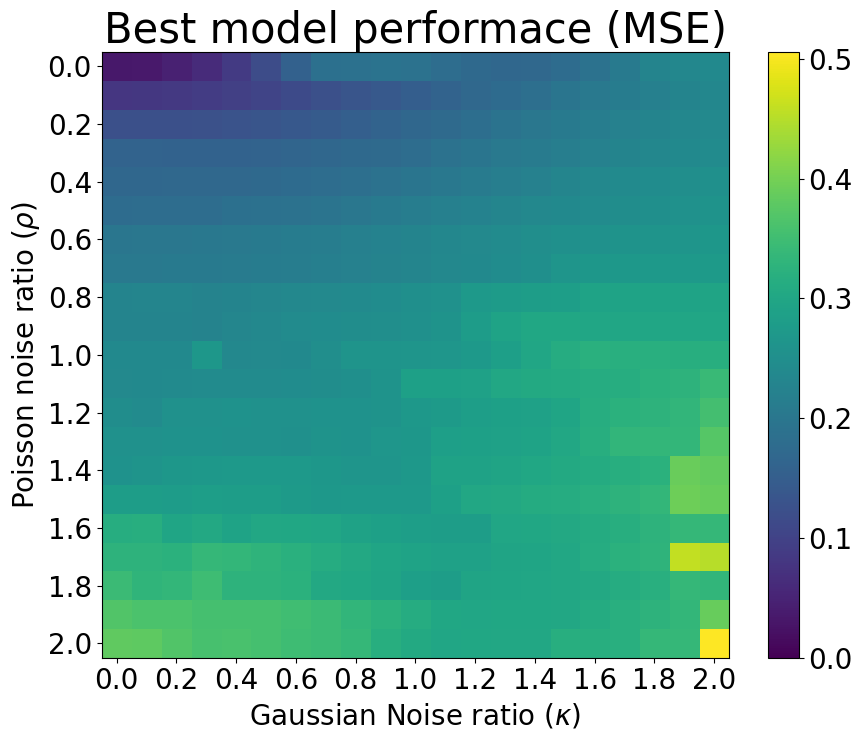

In [15]:

max_argmax_type = 'argmax'
model_names = ['pca', 'mlpca', 'fa', 'bpca_common', 'bpca_individual', 'mbpca_common', 'mbpca_individual']

rhos = np.arange(0,2.1,0.1)
kappas = np.arange(0,2.1,0.1)

savepath = './figs/artificial_data_calcium_rhos_kappas'
score_names = ['evs','mse']
for score_name in score_names:
    results = find_score_max_argmax(scores_models, model_names= model_names,score_name =score_name)
    figsize_cm = (6, 4)
    figsize = (figsize_cm[0]*scale*cm2inch, figsize_cm[1]*scale*cm2inch)
    imshow_max_argmax(results, rhos = rhos, bs = kappas, bs_type='kappa',
                      max_argmax_type ='argmax',score_name=score_name,
                      figsize = figsize,cmap ='Set2_r',savepath=savepath)
                      # figsize = figsize,cmap ='Dark2_r',savepath=savepath)
    
    figsize_cm = (4.8,4)
    figsize = (figsize_cm[0]*scale*cm2inch, figsize_cm[1]*scale*cm2inch)
    imshow_max_argmax(results, rhos = rhos, bs = kappas,  bs_type='kappa',
                      max_argmax_type ='max',score_name=score_name,
                        figsize = figsize,cmap ='viridis',savepath=savepath)
    




In [16]:
# def change_model_name_labels(model_names):
#     model_labels = [None]*len(model_names)
#     for i in range(len(model_names)):
#         if model_names[i] == 'pca':
#             model_labels[i] = 'PCA'
#         elif model_names[i] =='mlpca':
#             model_labels[i] = 'Probabilistic PCA'
#         elif model_names[i] =='fa':
#             model_labels[i] = 'Factor analysis'
#         elif model_names[i] =='bpca_common':
#             model_labels[i] = 'Bayesian PCA'
#         elif model_names[i] =='bpca_individual':
#             model_labels[i] = 'Bayesian PCA (individual)'
#         elif model_names[i] =='mbpca_common':
#             model_labels[i] = 'Dual ARD (shared)'
#         elif model_names[i] =='mbpca_individual':
#             model_labels[i] = 'Dual ARD (individual)'
#     return model_labels
   

In [17]:
def imshow_score_diff(socres_models, model_diff_names,rhos, bs,score_name ='evs',
                      figsize_cm= (4.5,4), vmax = 0.5, 
                      savepath = None):
    score_diff = socres_models[model_diff_names[0]][score_name][0:len(rhos),0:len(bs)]  \
                -socres_models[model_diff_names[1]][score_name][0:len(rhos),0:len(bs)]
    figsize = (figsize_cm[0]*scale*cm2inch, figsize_cm[1]*scale*cm2inch, )
    fig,ax = plt.subplots(figsize=figsize)
    im =ax.imshow(score_diff,cmap ='RdBu_r', vmax = vmax, vmin = -vmax)
    fig.colorbar(im,ax =ax)
    xlabel =r'Gaussian Noise ratio ($\kappa$)'
    ylabel =r'Poisson Noise ratio ($\rho$)'
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    if score_name =='evs':
        score_name_title ='EVS'
    elif score_name =='mse':
        score_name_title ='MSE'
    else:
        score_name_title =score_name

    model_diff_labels = get_model_name_labels(model_diff_names)
    
    ax.set_title(model_diff_labels[0]+' v.s. '+model_diff_labels[1]+'\n'+' ('+score_name_title+')',
                  fontsize = SMALL_SIZE)

   
    xticks = np.arange(0,len(bs),2)
    yticks =np.arange(0,len(rhos),2)
    xticklabels = np.round(bs[xticks],1)
    yticklabels = np.round(rhos[yticks],1)
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)
    ax.set_xticklabels(xticklabels)
    ax.set_yticklabels(yticklabels)
    fig.tight_layout()
    
    if savepath is not None:
        filename = score_name+'_diff_'+model_diff_names[0]+'_'+model_diff_names[1]+'.pdf'
        savefile = os.path.join(savepath, filename)
        fig.savefig(savefile)

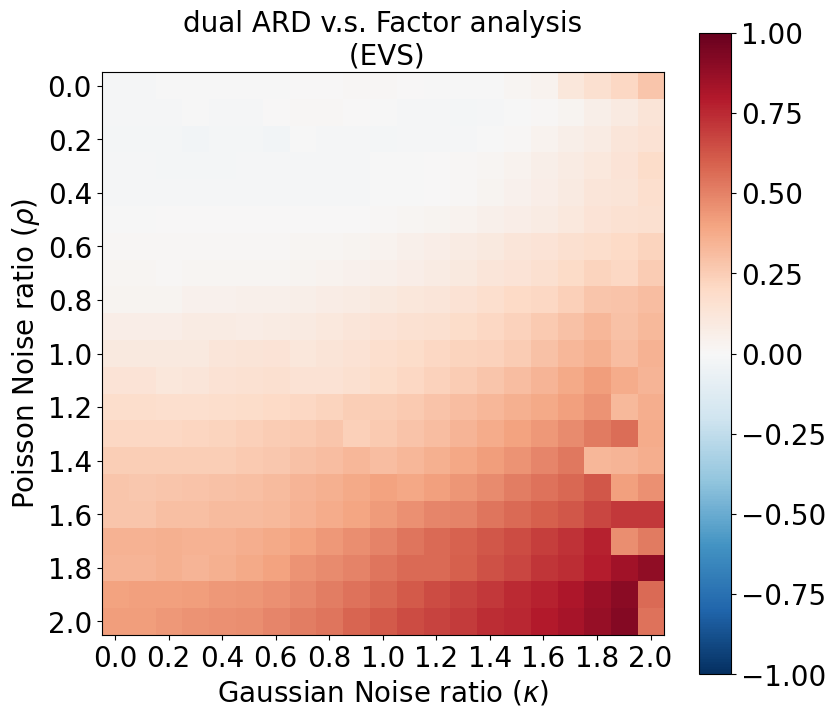

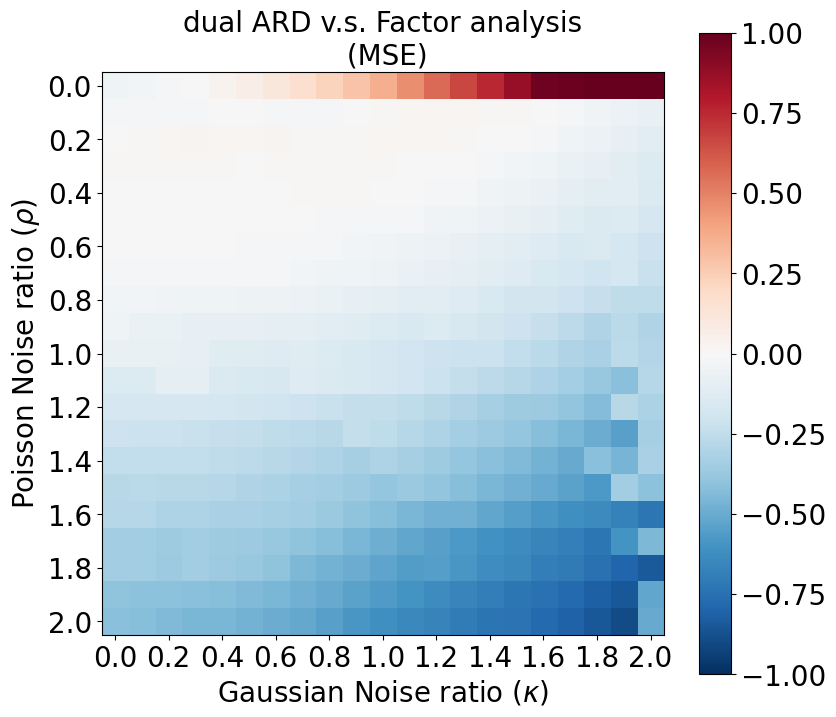

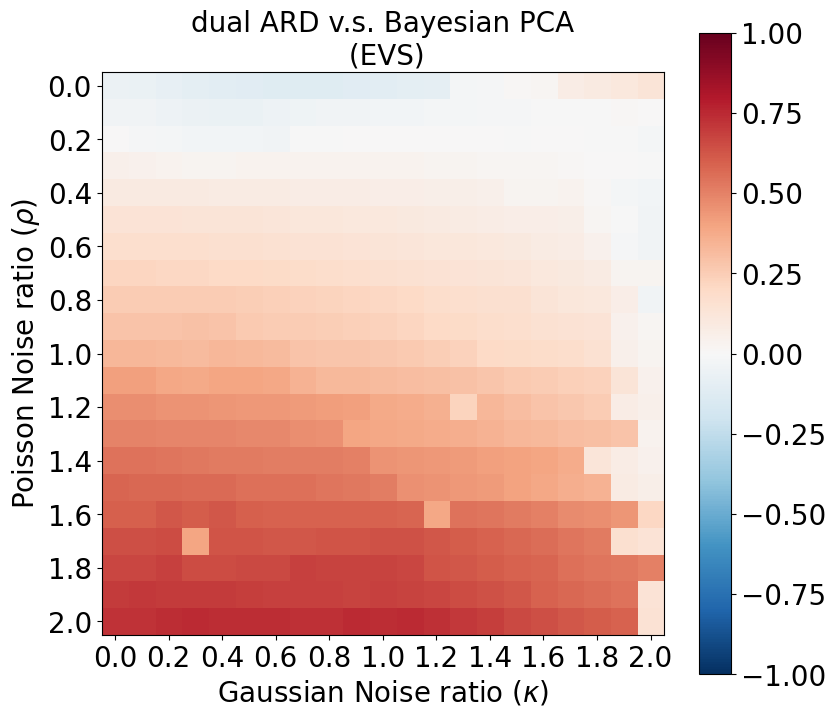

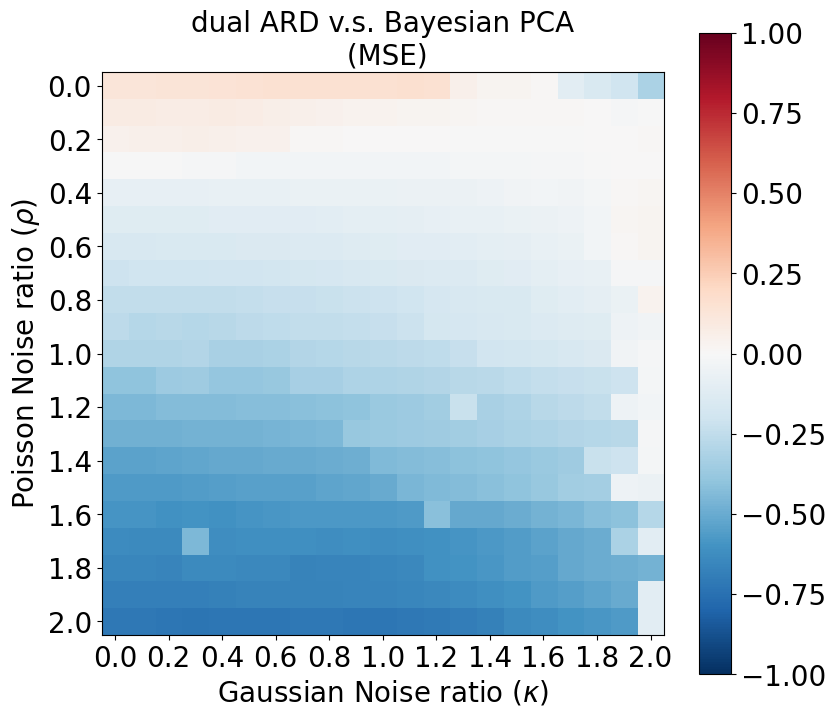

In [18]:
model_diff_names = [['mbpca_individual','fa'],
                    ['mbpca_individual','bpca_common']]
savepath ='./figs/artificial_data_calcium_rhos_kappas/'
for model_diff_name in model_diff_names:
    imshow_score_diff(scores_models,model_diff_name,rhos, bs = kappas,score_name = 'evs',figsize_cm= (4.5,4), 
                        vmax = 1,savepath = savepath)
    imshow_score_diff(scores_models,model_diff_name,rhos, bs = kappas,score_name = 'mse',figsize_cm= (4.5,4), 
                        vmax = 1,savepath = savepath)


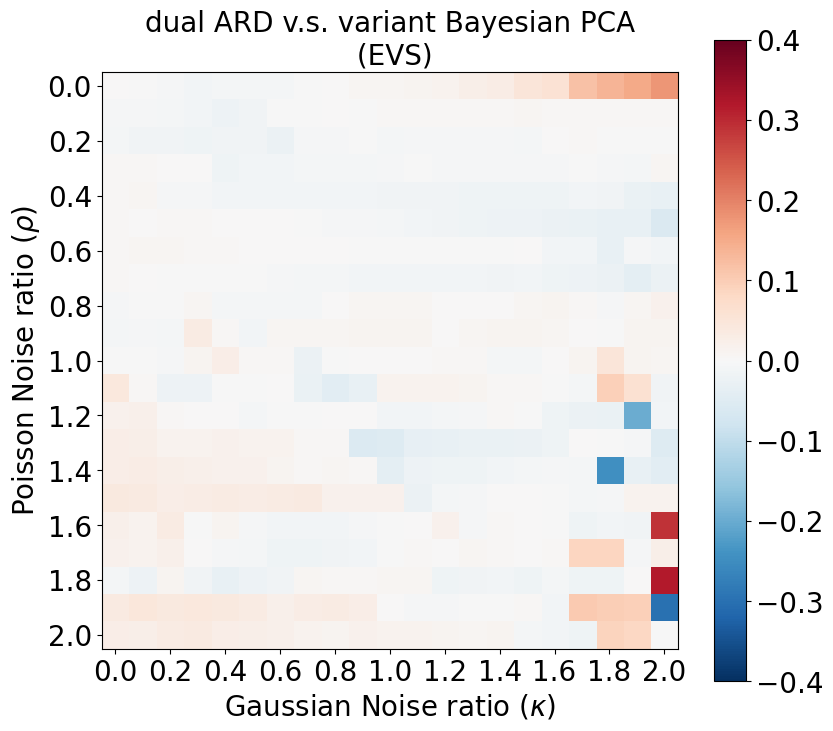

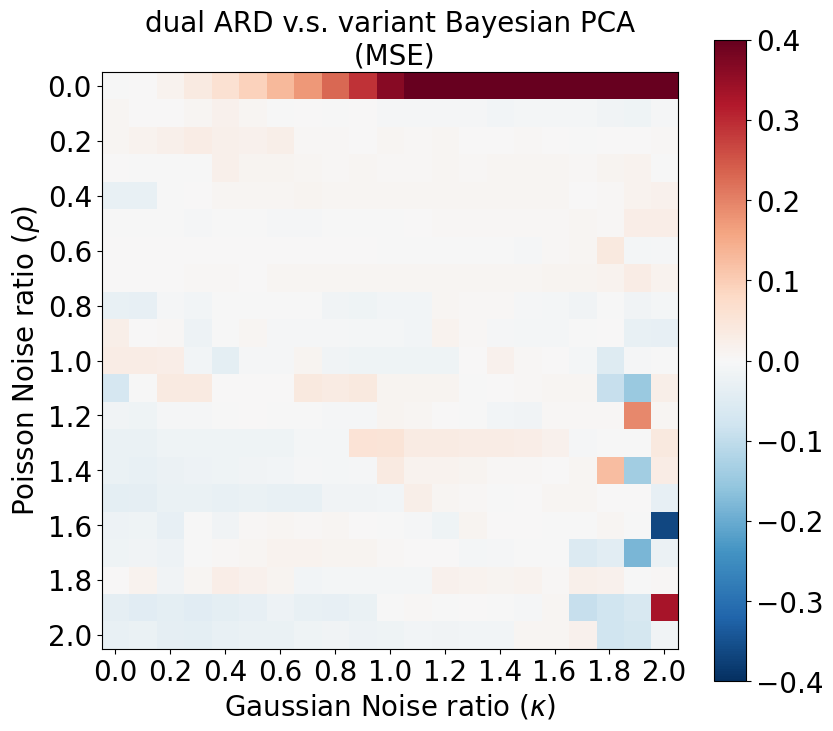

In [19]:

model_diff_names = [
                    ['mbpca_individual','bpca_individual'],
                    # ['mbpca_individual','mbpca_common'],
                    # ['mbpca_individual','pca'],
                    # ['mbpca_individual','mlpca']
                    ]
for model_diff_name in model_diff_names:
    imshow_score_diff(scores_models,model_diff_name,rhos, bs = kappas,score_name = 'evs',figsize_cm= (4.5,4), 
                        vmax = 0.4,savepath = savepath)
    imshow_score_diff(scores_models,model_diff_name,rhos, bs = kappas,score_name = 'mse',figsize_cm= (4.5,4), 
                        vmax = 0.4,savepath = savepath)




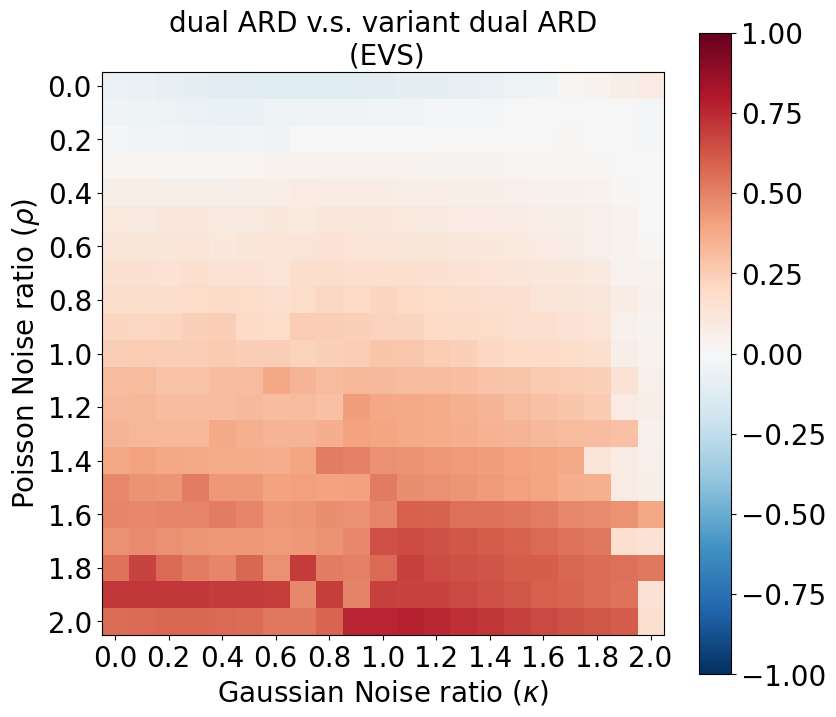

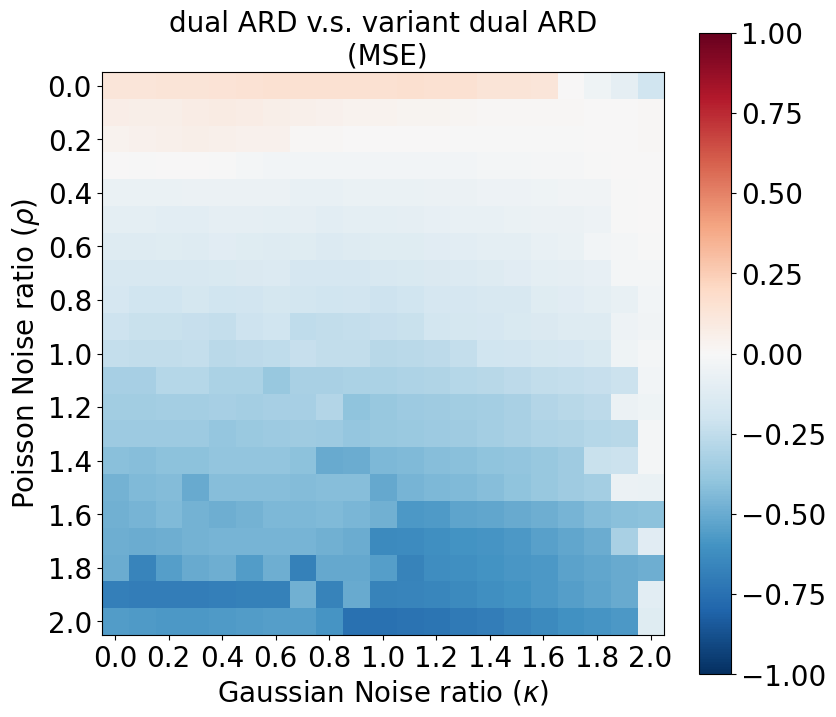

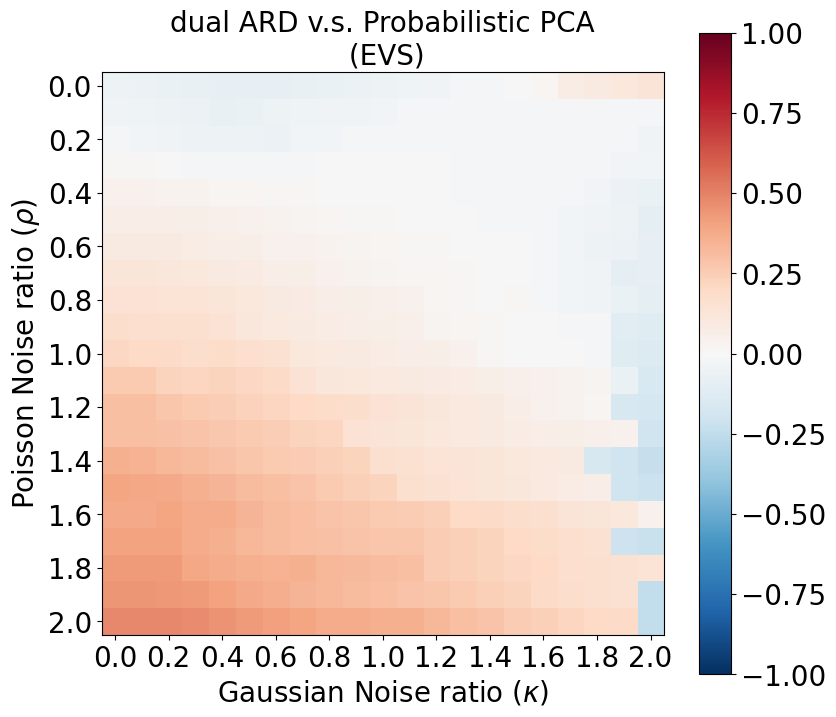

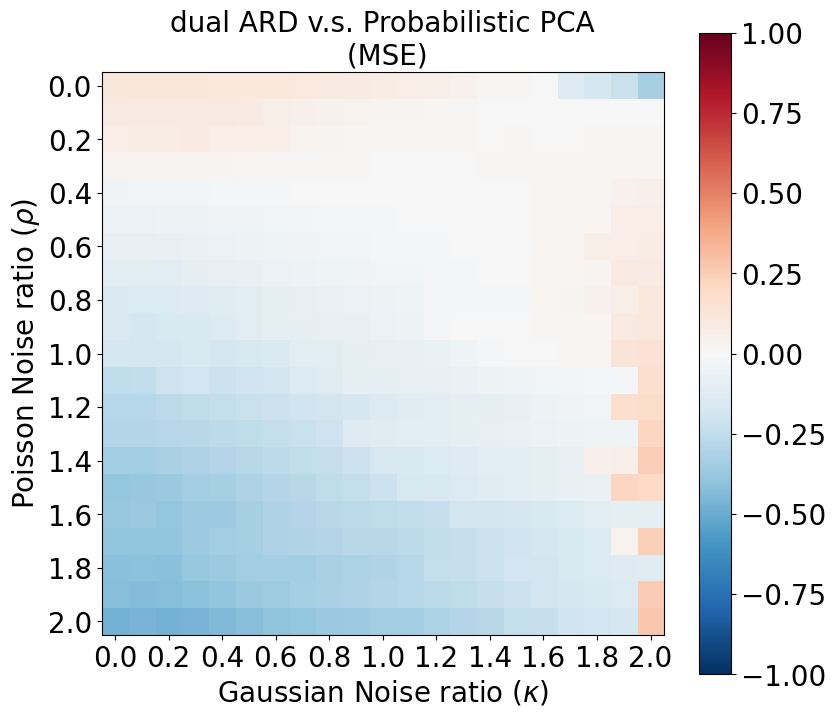

In [20]:

model_diff_names = [
                    # ['mbpca_individual','bpca_individual'],
                    ['mbpca_individual','mbpca_common'],
                    # ['mbpca_individual','pca'],
                    ['mbpca_individual','mlpca']
                    ]
for model_diff_name in model_diff_names:
    imshow_score_diff(scores_models,model_diff_name,rhos, bs = kappas,score_name = 'evs',figsize_cm= (4.5,4), 
                        vmax = 1,savepath = savepath)
    imshow_score_diff(scores_models,model_diff_name,rhos, bs = kappas,score_name = 'mse',figsize_cm= (4.5,4), 
                        vmax = 1,savepath = savepath)


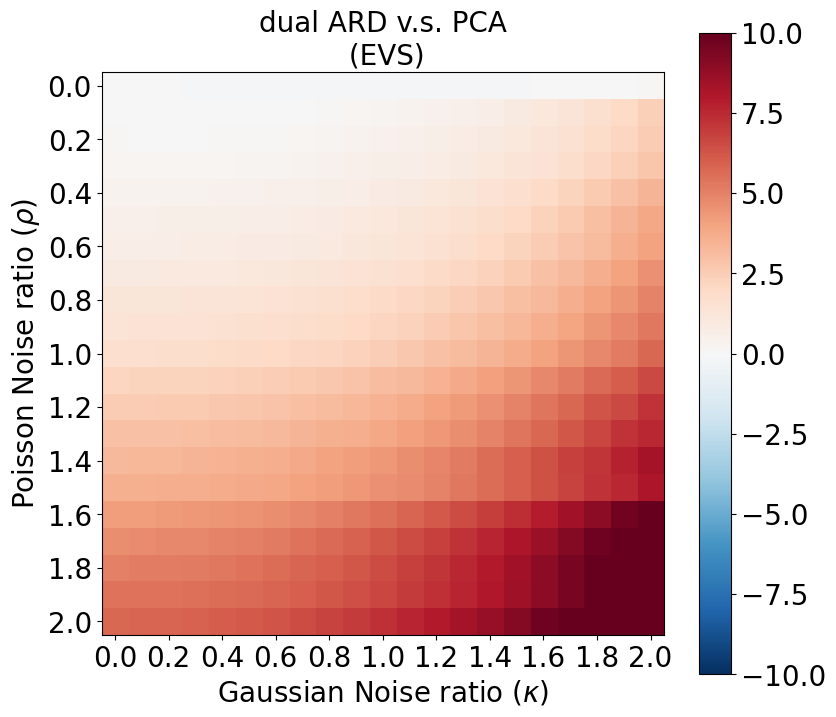

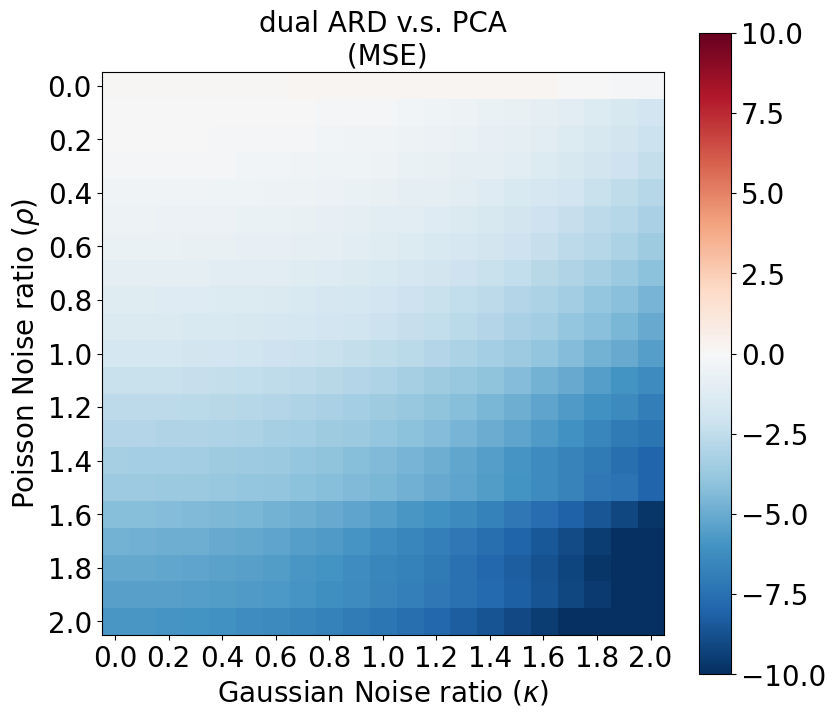

In [21]:
model_diff_names = [
                    # ['mbpca_individual','bpca_individual'],
                    # ['mbpca_individual','mbpca_common'],
                    ['mbpca_individual','pca'],
                    # ['mbpca_individual','mlpca']
                    ]
for model_diff_name in model_diff_names:
    imshow_score_diff(scores_models,model_diff_name,rhos, bs = kappas,score_name = 'evs',figsize_cm= (4.5,4), 
                        vmax = 10,savepath = savepath)
    imshow_score_diff(scores_models,model_diff_name,rhos, bs = kappas,score_name = 'mse',figsize_cm= (4.5,4), 
                        vmax = 10,savepath = savepath)

In [22]:
def imshow_score(scores_models, model_name='pca', score_name='evs', 
                 rhos = None, bs=None, 
                 vmin = 0, vmax = 1,cmap ='viridis', figsize = (6,5),
                 savepath = None):
    
    score = scores_models[model_name][score_name]
    if score_name =='evs':
        score_name_title ='EVS'
    elif score_name =='mse':
        score_name_title = 'MSE'
    else:
        score_name_title = score_name

    model_label = get_model_name_labels([model_name])
    title =model_label[0]+' ('+score_name_title+')'

    fig,ax = plt.subplots(figsize = figsize)
    im=ax.imshow(score,vmin = vmin, vmax = vmax, aspect = 'auto',cmap = cmap);
    xlabel =r'Gaussian Noise ratio ($\kappa$)'
    ylabel =r'Poisson noise ratio ($\rho$)'
    fig.colorbar(im)
    #set ticks
    xticks = np.arange(0,len(bs),2)
    yticks =np.arange(0,len(rhos),2)
    xticklabels = np.round(bs[xticks],1) # bs:sns or kappas
    yticklabels = np.round(rhos[yticks],1)
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)
    ax.set_xticklabels(xticklabels)
    ax.set_yticklabels(yticklabels)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    fig.tight_layout()
    if savepath is not None:
        figname = 'score_'+score_name+'_'+model_name+'.pdf'
        figfile = os.path.join(savepath, figname)
        fig.savefig(figfile)





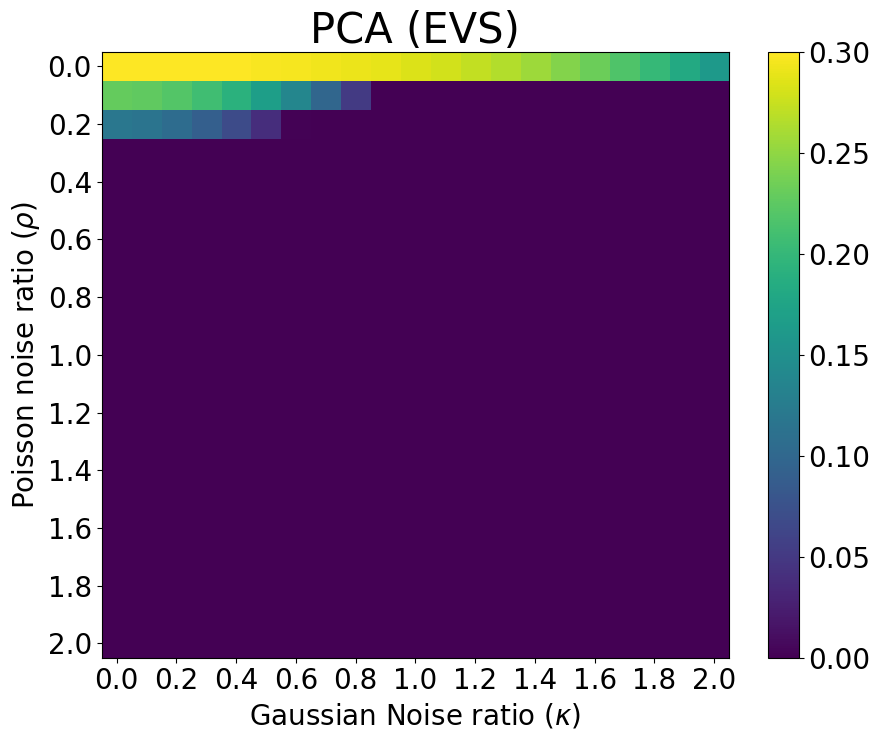

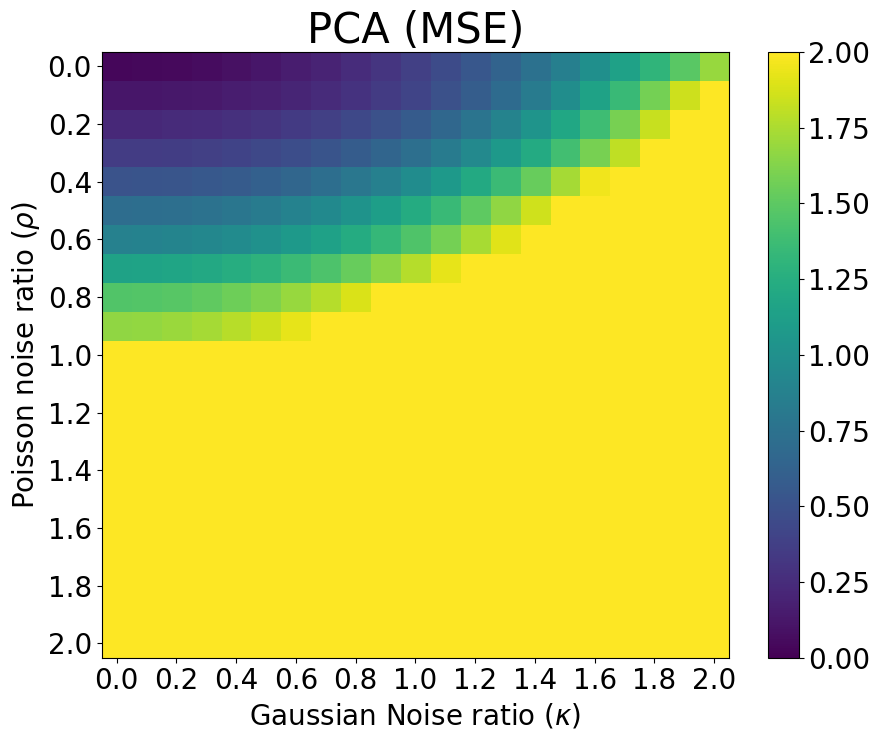

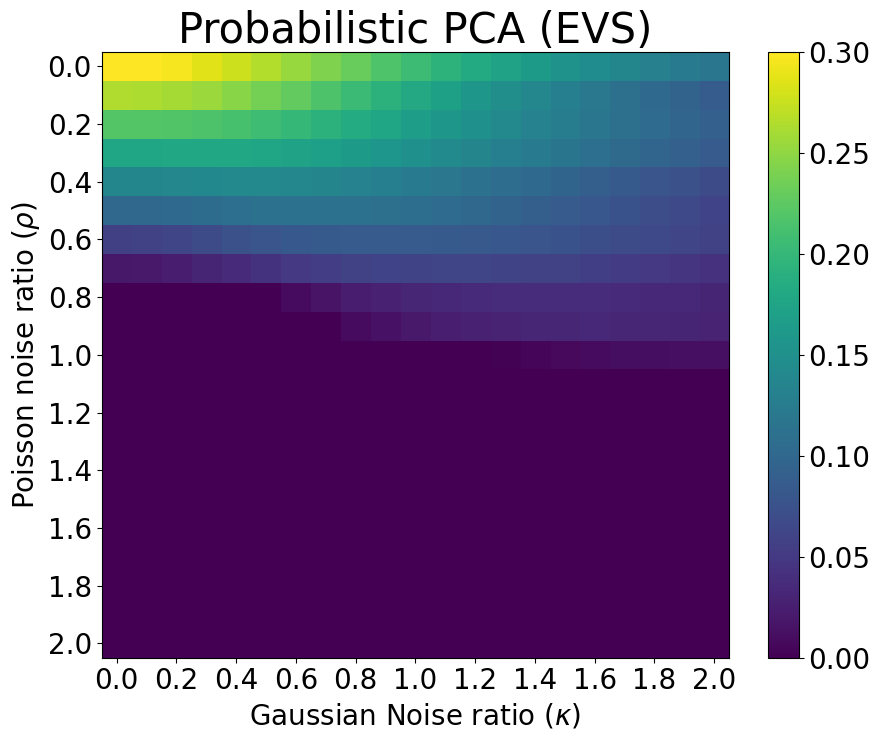

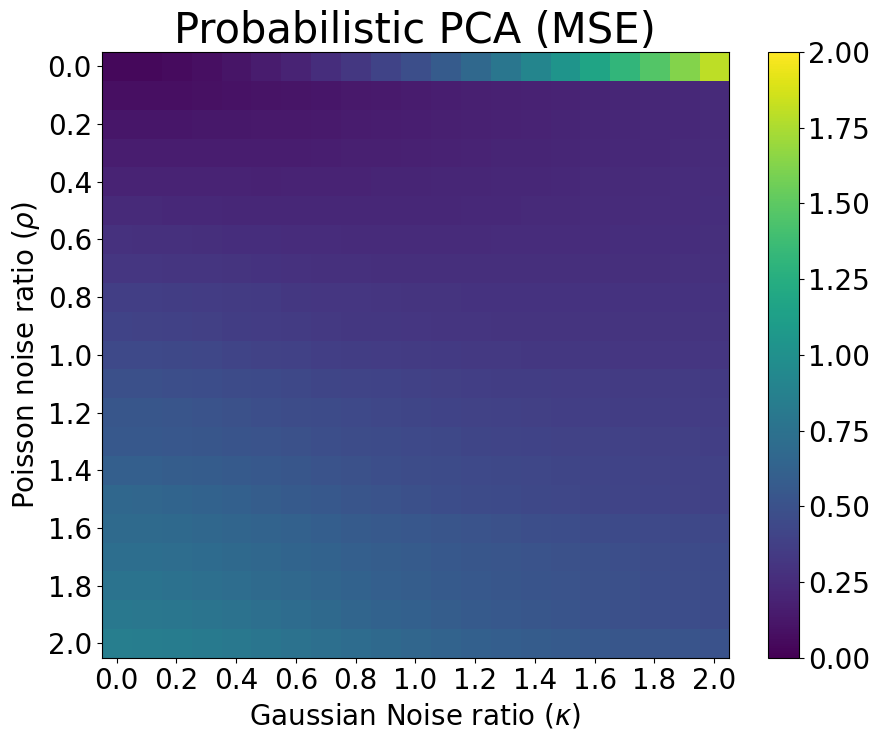

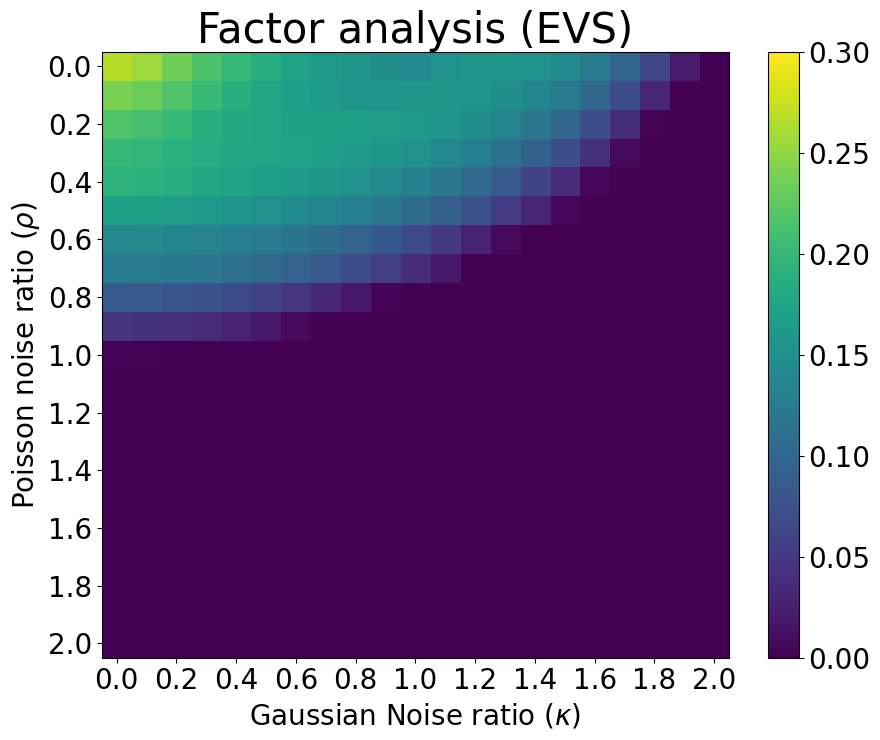

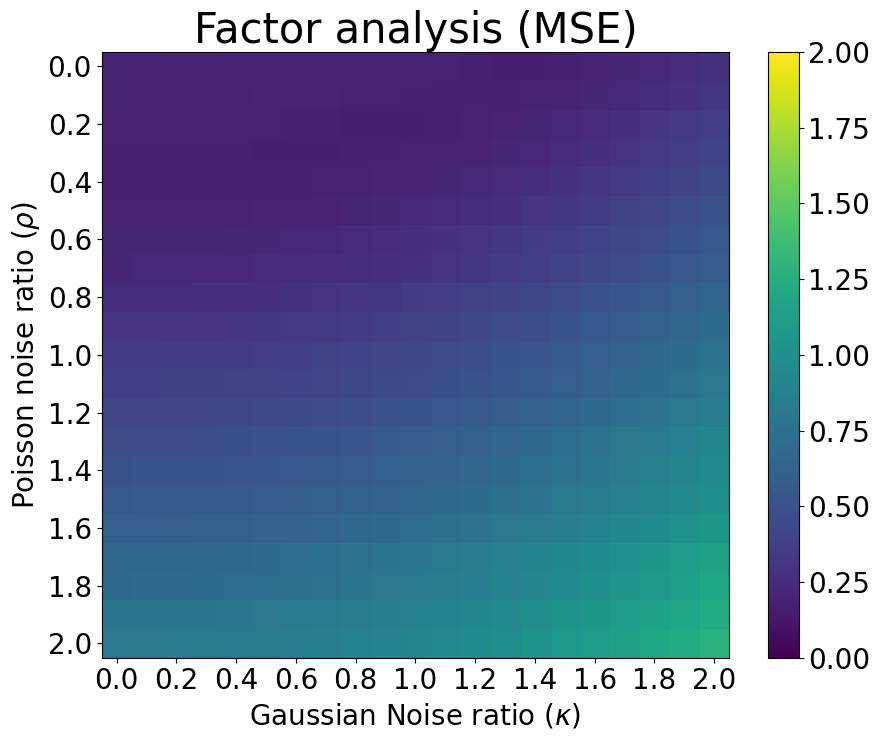

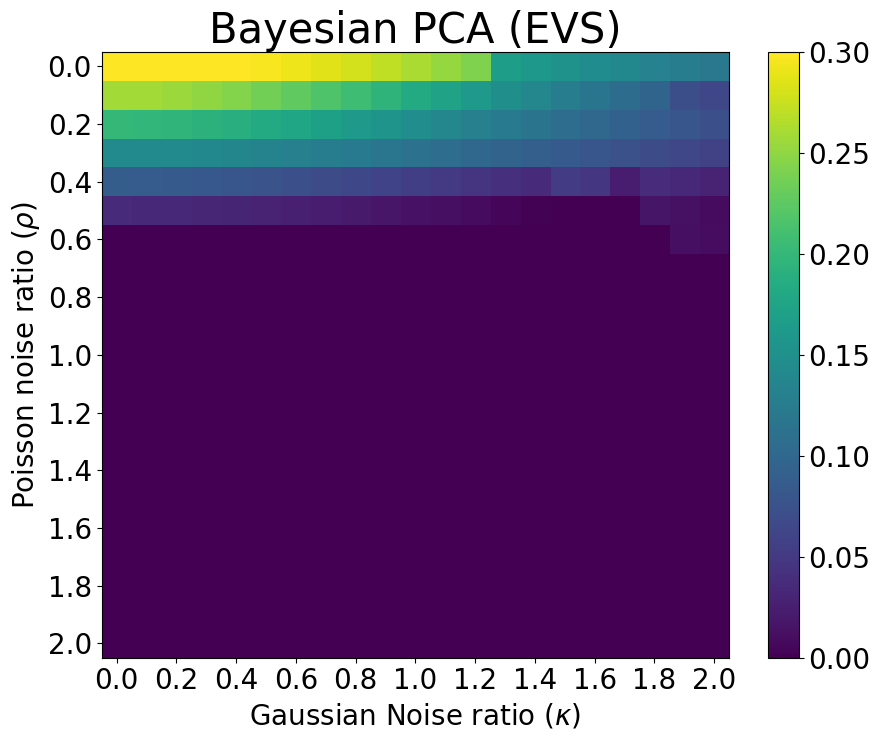

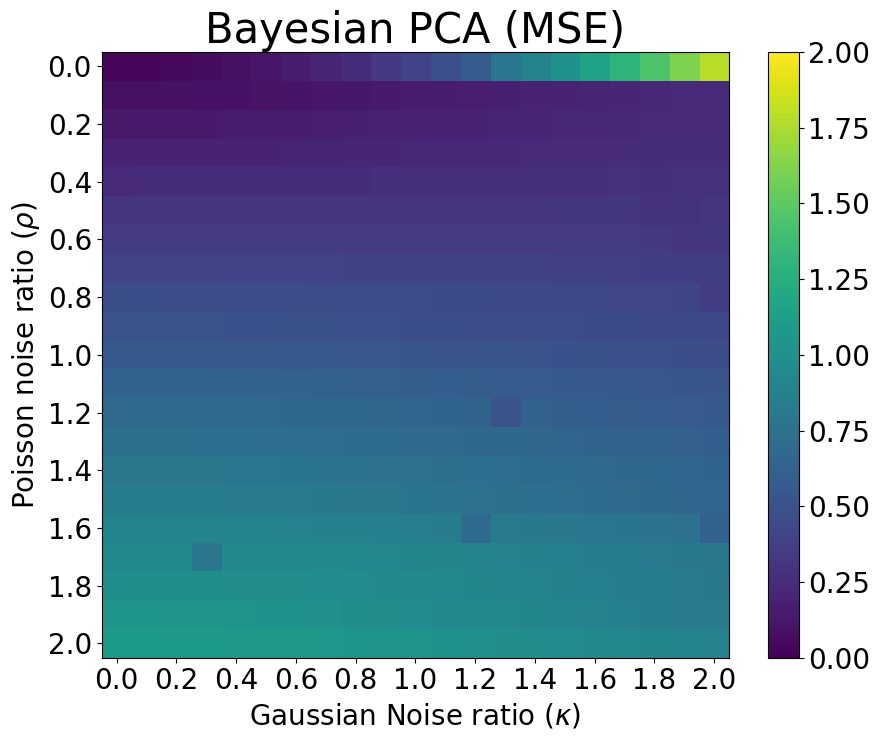

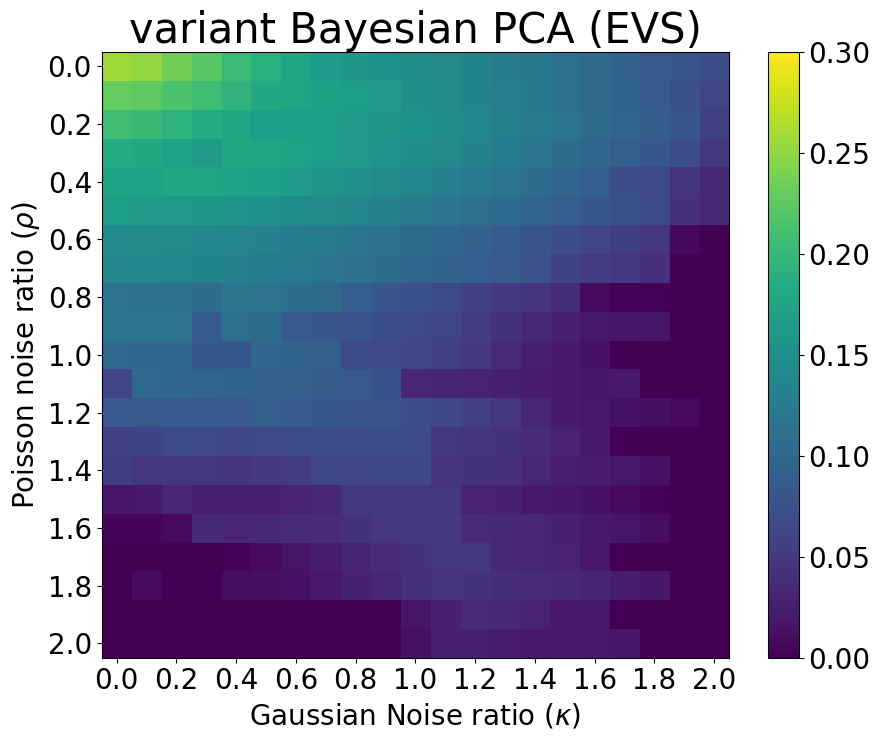

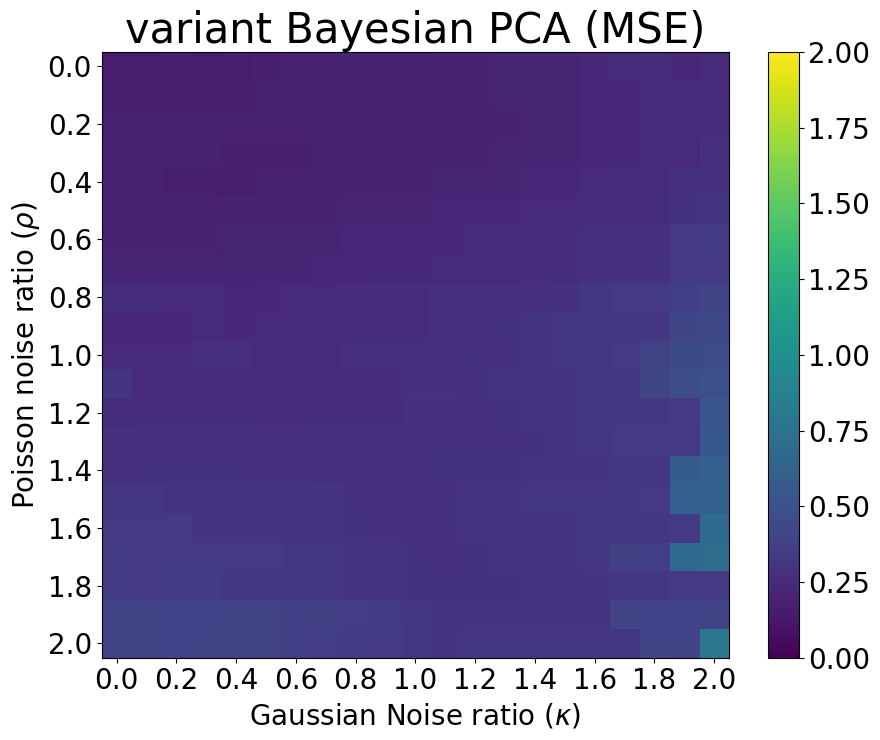

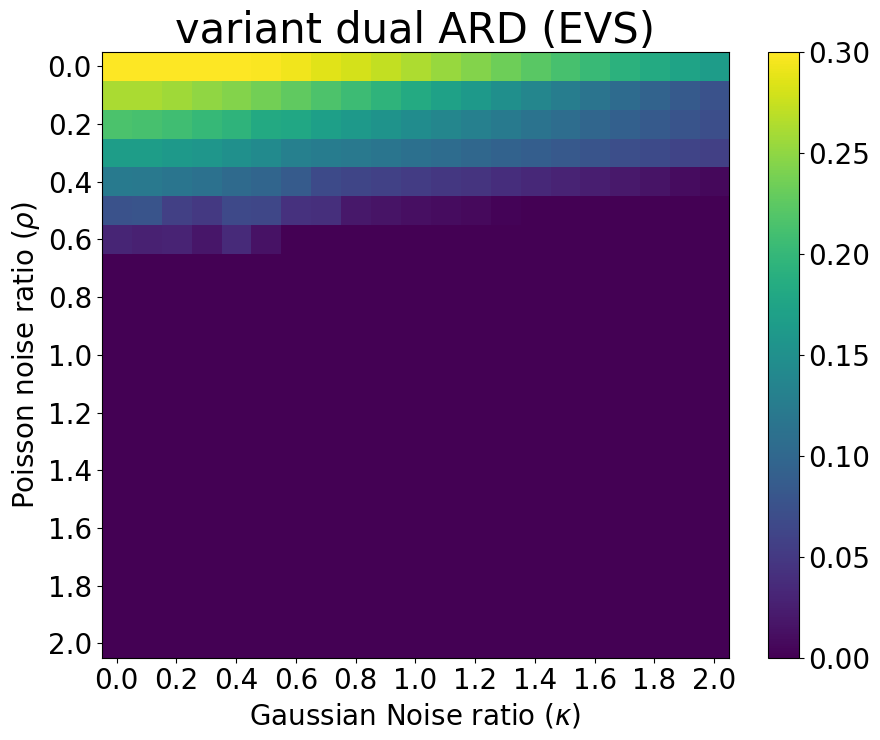

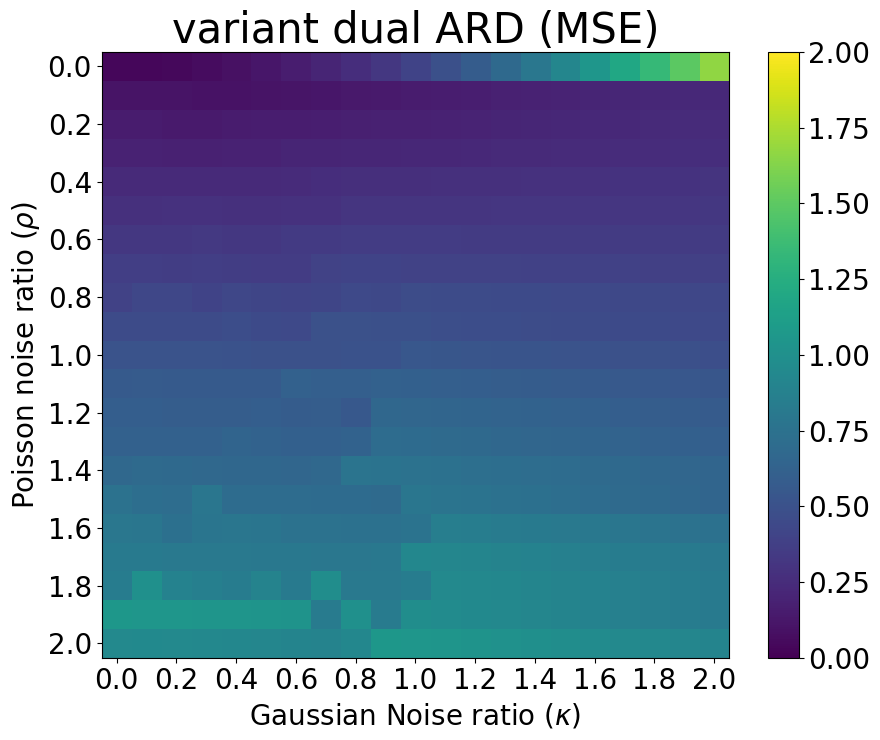

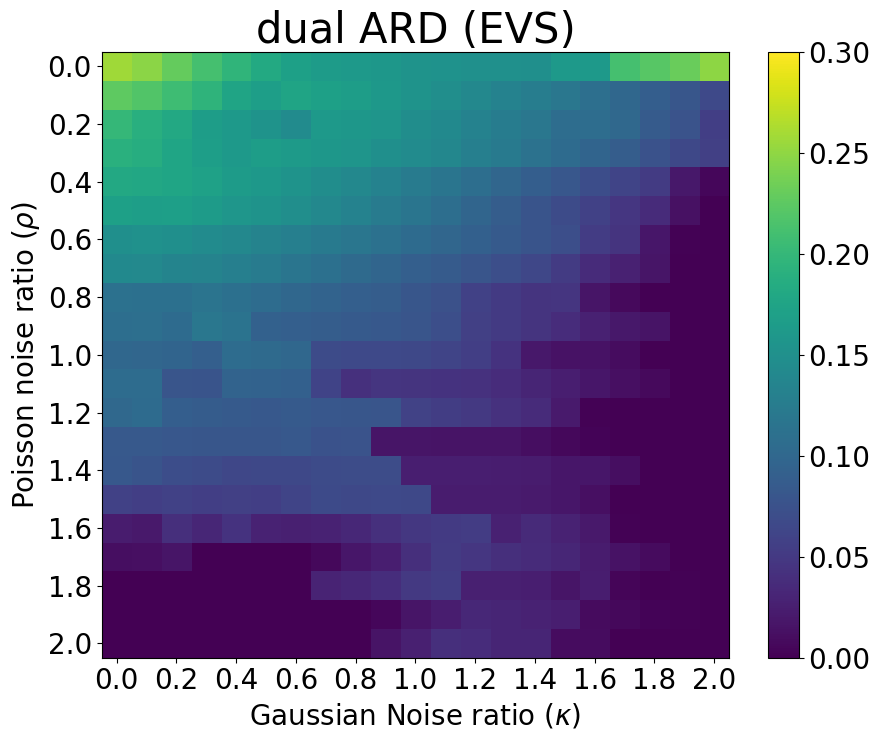

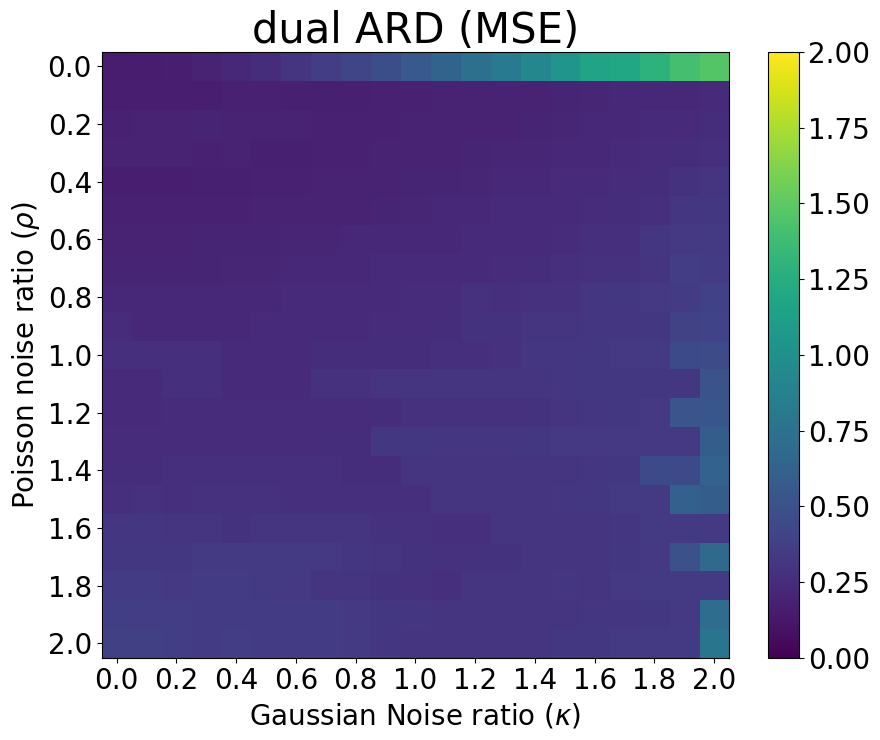

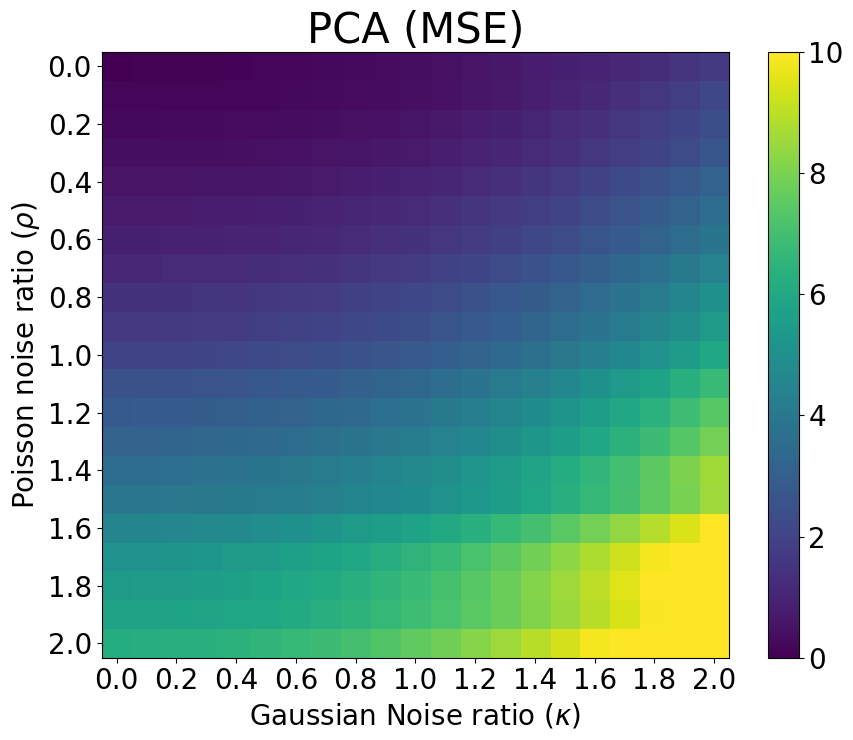

In [23]:
savepath = './figs/artificial_data_calcium_rhos_kappas/'
for model_name in model_names:
    imshow_score(scores_models,model_name =model_name, score_name = 'evs',
                rhos = rhos, bs = kappas, cmap = 'viridis', figsize = figsize,
                vmin = 0, vmax = 0.3, savepath = savepath)
    
    imshow_score(scores_models,model_name =model_name, score_name = 'mse',
                rhos = rhos, bs = kappas, cmap = 'viridis', figsize = figsize,
                vmin = 0, vmax = 2, savepath = savepath)
    
imshow_score(scores_models,model_name ='pca', score_name = 'mse',
                rhos = rhos, bs = kappas, cmap = 'viridis', figsize = figsize,
                vmin = 0, vmax = 10, savepath = savepath)